In [2]:
from google.colab import files
uploaded = files.upload()

Saving big_data.csv to big_data.csv


In [54]:
import pandas as pd
data = pd.read_csv('big_data.csv')
pd.DataFrame.from_records(data)

,arr_delay,distance,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,total_dep_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,-7,270,0,0,0,0,0,0,0,13,36.6,33.4,1022.4,984.4,5.9,3.3,0.00,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1995,0,0,0,0,0,0,0,24,48.3,36.9,1020.3,1008.4,10.0,3.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,621,0,0,0,0,0,0,0,17,65.1,49.0,1016.4,977.5,10.0,3.2,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-33,2065,0,0,0,0,0,0,0,1,55.3,45.5,1021.8,944.7,10.0,4.2,0.11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-19,1771,0,0,0,0,0,0,0,10,36.9,14.8,1017.0,938.9,10.0,6.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177507,8,337,0,0,0,0,0,0,0,22,50.2,36.8,1016.4,15.9,9.9,12.7,0.08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177508,10,1024,0,1,0,0,0,0,0,22,41.9,24.7,1026.8,8.6,10.0,7.7,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177509,44,1585,0,1,0,0,0,0,0,56,38.8,8.8,1031.5,30.5,10.0,8.8,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177510,-15,337,0,0,0,0,0,0,0,13,53.5,41.1,1014.4,2.6,10.0,7.3,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Predictions for Arrival Delay

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

data.dropna(axis=0, subset=['arr_delay'], inplace=True)

y = data.arr_delay
X = data.drop(['arr_delay'], axis=1).select_dtypes(exclude=['object'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Mean Absolute Error results

In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [59]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[18:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.686198


# Using k-fold Cross Validation for model tuning

In [61]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[18:01:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [62]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,41.508718,0.103943,41.521145,0.207252
1,39.282958,1.427370,39.298312,1.723997
2,38.255065,2.349752,38.284343,2.695878
3,38.171123,2.361523,38.239312,2.694978
4,37.278604,3.411559,37.357897,3.752378


## Better RMSE

In [63]:
print((cv_results["test-rmse-mean"]).tail(1))

49    19.407878
Name: test-rmse-mean, dtype: float64


In [64]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[18:04:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Visualizations

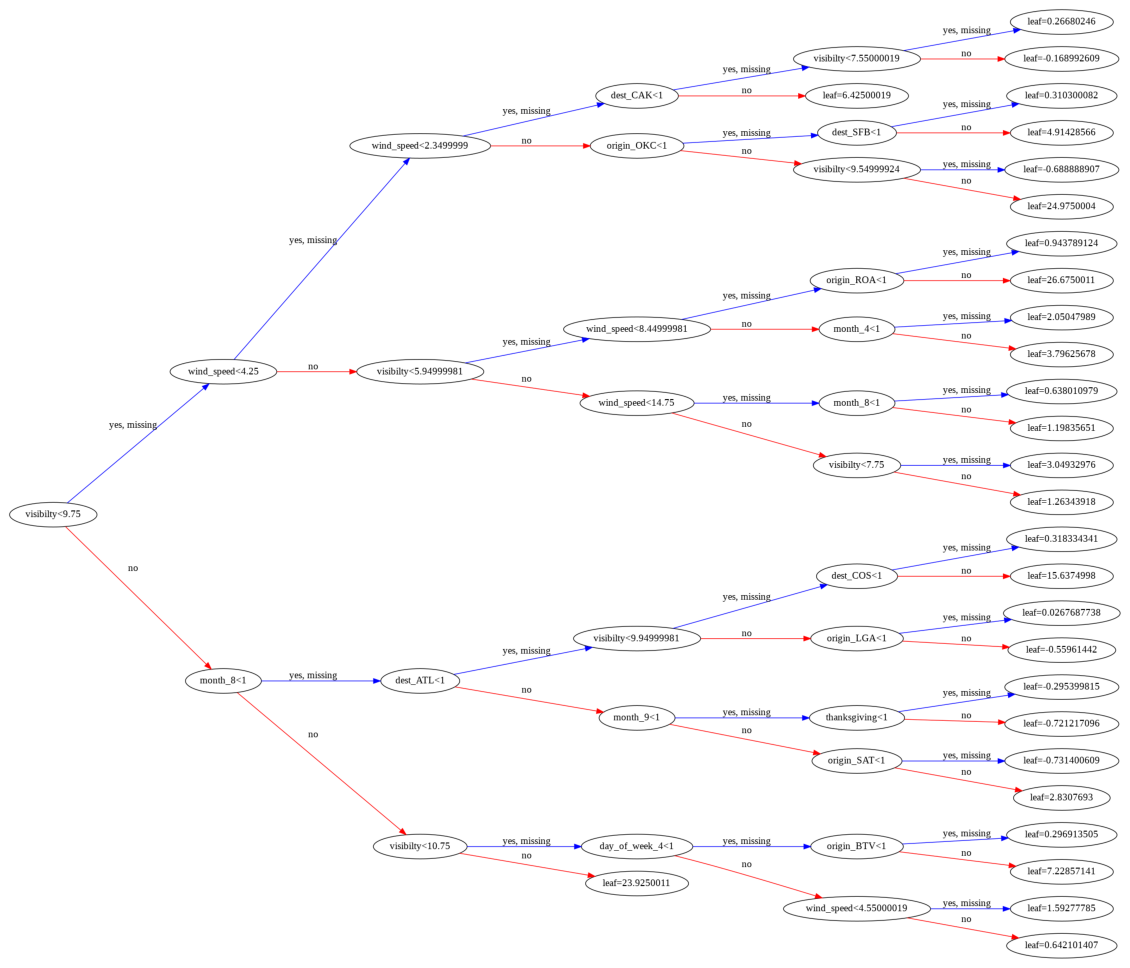

In [70]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 20,20
plot_tree(xg_reg, num_trees=0, rankdir='LR')
# xgb.plot_tree(xg_reg,num_trees=0)
# xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR')
# plt.show()

### Top Features

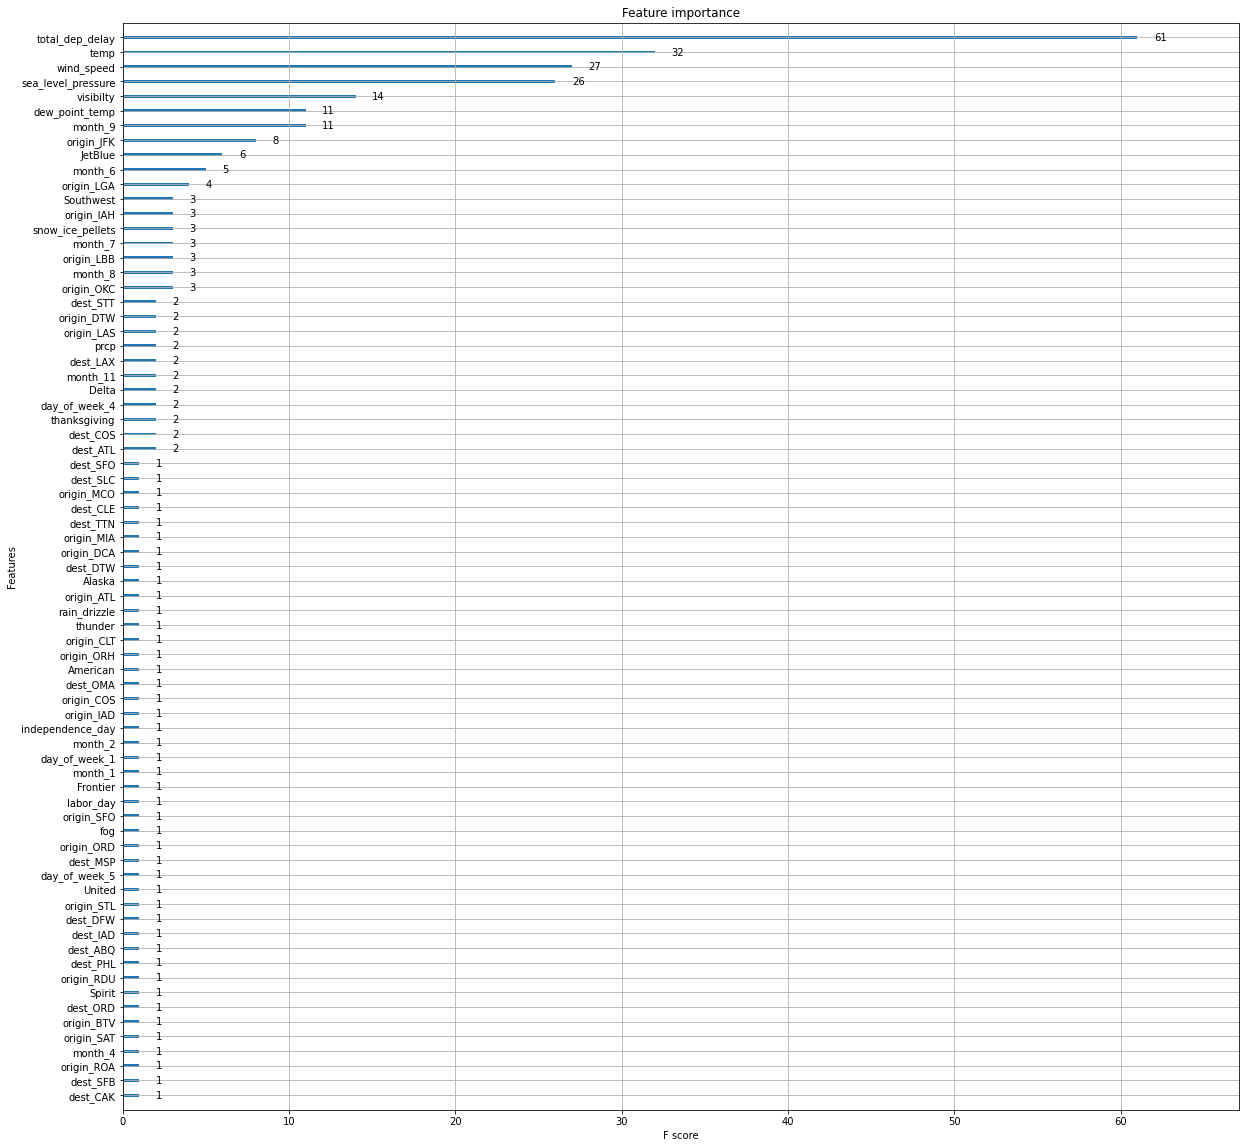

In [71]:
xgb.plot_importance(xg_reg)
plt.rcParams["figure.figsize"] = 20,20
plt.show()

# Predictions for Departure Delay

In [72]:
import pandas as pd
data = pd.read_csv('big_data.csv')
pd.DataFrame.from_records(data)

,arr_delay,distance,presidents_day,easter,memorial_day,independence_day,labor_day,thanksgiving,winter_holiday,total_dep_delay,temp,dew_point_temp,sea_level_pressure,station_pressure,visibilty,wind_speed,prcp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,...,dest_RIC,dest_RNO,dest_ROA,dest_ROC,dest_RSW,dest_SAN,dest_SAT,dest_SAV,dest_SBA,dest_SCK,dest_SDF,dest_SEA,dest_SFB,dest_SFO,dest_SGF,dest_SHV,dest_SIT,dest_SJC,dest_SJU,dest_SLC,dest_SMF,dest_SNA,dest_SRQ,dest_STL,dest_STT,dest_STX,dest_SWF,dest_SYR,dest_TLH,dest_TPA,dest_TRI,dest_TTN,dest_TUL,dest_TUS,dest_TVC,dest_TYS,dest_USA,dest_UST,dest_VPS,dest_XNA
0,-7,270,0,0,0,0,0,0,0,13,36.6,33.4,1022.4,984.4,5.9,3.3,0.00,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1995,0,0,0,0,0,0,0,24,48.3,36.9,1020.3,1008.4,10.0,3.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,621,0,0,0,0,0,0,0,17,65.1,49.0,1016.4,977.5,10.0,3.2,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-33,2065,0,0,0,0,0,0,0,1,55.3,45.5,1021.8,944.7,10.0,4.2,0.11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-19,1771,0,0,0,0,0,0,0,10,36.9,14.8,1017.0,938.9,10.0,6.2,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177507,8,337,0,0,0,0,0,0,0,22,50.2,36.8,1016.4,15.9,9.9,12.7,0.08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177508,10,1024,0,1,0,0,0,0,0,22,41.9,24.7,1026.8,8.6,10.0,7.7,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177509,44,1585,0,1,0,0,0,0,0,56,38.8,8.8,1031.5,30.5,10.0,8.8,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177510,-15,337,0,0,0,0,0,0,0,13,53.5,41.1,1014.4,2.6,10.0,7.3,0.00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

data.dropna(axis=0, subset=['total_dep_delay'], inplace=True)

y = data.total_dep_delay
X = data.drop(['total_dep_delay'], axis=1).select_dtypes(exclude=['object'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Mean Absolute Error results

In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [77]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[19:02:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [78]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 32.142434


# Using k-fold Cross Validation for model tuning

In [79]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[19:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:04:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,38.656838,0.041707,38.663035,0.085181
1,37.358302,0.049064,37.371316,0.079493
2,36.254335,0.051466,36.275592,0.077880
3,35.338801,0.054763,35.367652,0.076687
4,34.576529,0.050749,34.611799,0.078184


## Better RMSE

In [81]:
print((cv_results["test-rmse-mean"]).tail(1))

49    11.025499
Name: test-rmse-mean, dtype: float64


In [82]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[19:07:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Visualizations

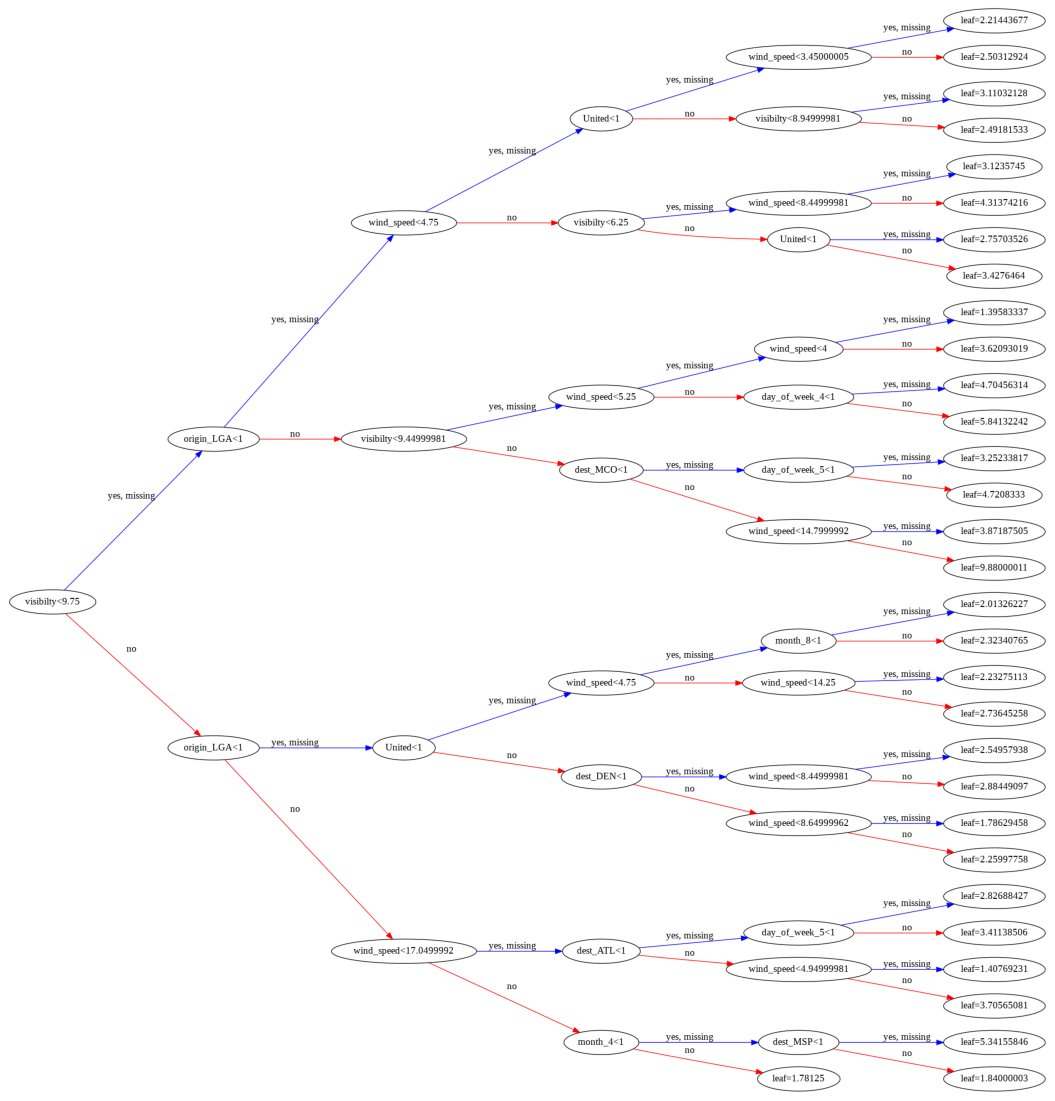

In [83]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 20,20
plot_tree(xg_reg, num_trees=0, rankdir='LR')
# xgb.plot_tree(xg_reg,num_trees=0)
# xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR')
# plt.show()

### Top Features

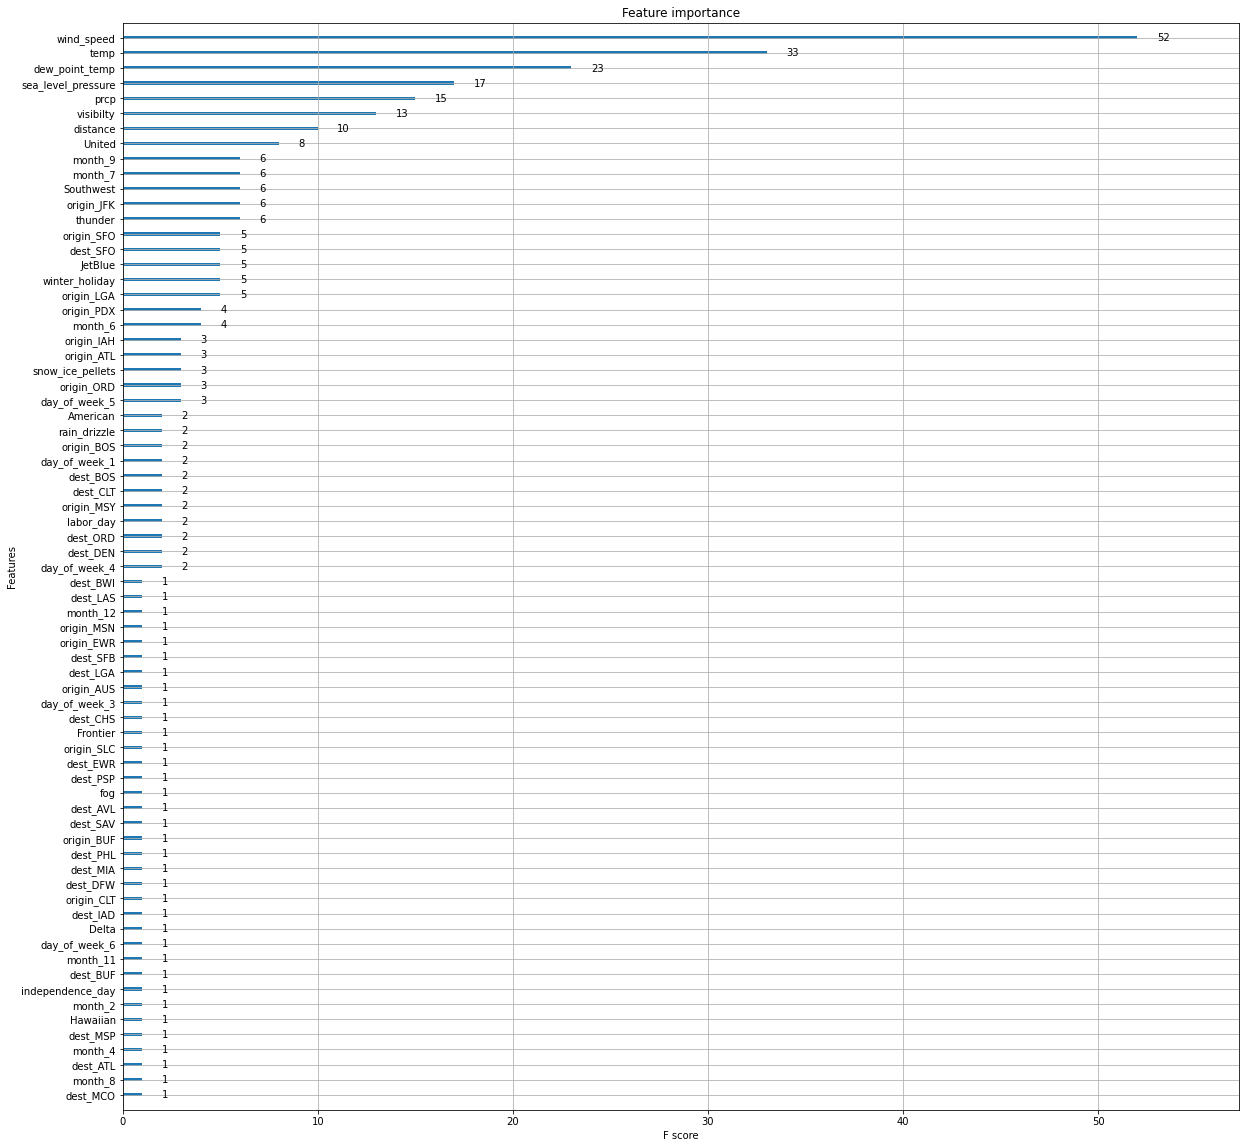

In [84]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()